In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import datetime

# File to Load 
satellite_data = "resources/UCS-Satellite-Database-8-1-2020.csv"


# Read satellite data file and store into Pandas DataFrames
satellite_df = pd.read_csv(satellite_data)


# View Data


satellite_df

,"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
0,1HOPSAT-TD (1st-generation High Optical Perfor...,1HOPSAT,NR (3/20),USA,Hera Systems,Commercial,Earth Observation,Technology Development,LEO,Non-Polar Inclined,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3Cat-1,3Cat-1,NR,Spain,Universitat Politècnica de Catalunya,Civil,Technology Development,NaN,LEO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aalto-1,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,NaN,LEO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAUSat-4,AAUSat-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"ABS-2 (Koreasat-8, ST-3)",ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2782,Ziyuan 1-02C,Ziyuan 1-02C,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,NaN,LEO,Sun-Synchronous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2783,Ziyuan 1-2D,Ziyuan 1-2D,NR (11/19),China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,NaN,LEO,Sun-Synchronous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2784,Ziyuan 3 (ZY-3),Ziyuan 3,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,NaN,LEO,Sun-Synchronous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2785,Ziyuan 3-2,Ziyuan 3-2,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,NaN,LEO,Sun-Synchronous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Drop duplicate satellite names column. Only using current official satellite name
cleaned_data = satellite_df.drop(columns =['Name of Satellite, Alternate Names'])
cleaned_data = cleaned_data.drop(columns = ['Unnamed: 28' , 'Unnamed: 31'])


#Drop Unnamed columns
col_index = 37
for x in range(30):
    cleaned_data = cleaned_data.drop(columns = [f'Unnamed: ' + str(col_index) ])    
    col_index = col_index + 1
    

In [3]:
# Remove sources columns
cleaned_data = cleaned_data.drop(columns = ['Source'])

source_index = 1
for x in range(5):
    cleaned_data = cleaned_data.drop(columns = [f'Source.' + str(source_index) ])    
    source_index = source_index + 1

cleaned_data

,Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),...,Date of Launch,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments,Source Used for Orbital Data
0,1HOPSAT,NR (3/20),USA,Hera Systems,Commercial,Earth Observation,Technology Development,LEO,Non-Polar Inclined,0.0,...,12/11/2019,0.5,Hera Systems,USA,Satish Dhawan Space Centre,PSLV,2019-089H,44859,Pathfinder for planned earth observation const...,JMSatcat/3_20
1,3Cat-1,NR,Spain,Universitat Politècnica de Catalunya,Civil,Technology Development,NaN,LEO,NaN,0.0,...,11/29/2018,NaN,Universitat Politècnica de Catalunya,Spain,Satish Dhawan Space Centre,PSLV,2018-096K,43728,Student built.,Estimated
2,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,NaN,LEO,NaN,0.0,...,6/23/2017,2.0,Aalto University,Finland,Satish Dhawan Space Centre,PSLV,2017-036L,42775,Technology development and education.,JMSatcat/10_17
3,AAUSat-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0.0,...,4/25/2016,NaN,University of Aalborg,Denmark,Guiana Space Center,Soyuz 2.1a,2016-025E,41460,Carries AIS system.,Space50
4,ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,75.0,...,2/6/2014,15.0,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508,"32 C-band, 51 Ku-band, and 6 Ka-band transpond...",ZARYA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2782,Ziyuan 1-02C,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,NaN,LEO,Sun-Synchronous,0.0,...,12/22/2011,NaN,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B,2011-079A,38038,Can acquire high-resolution data through remot...,SC - ASCR
2783,Ziyuan 1-2D,NR (11/19),China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,NaN,LEO,Sun-Synchronous,0.0,...,9/14/2019,5.0,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B,2019-059A,44528,Hyperspectral imaging,JMSatcat/11_19
2784,Ziyuan 3,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,NaN,LEO,Sun-Synchronous,0.0,...,1/9/2012,4.0,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B,2012-001A,38046,Land survey satellite.,www.spacedebris.net 12/12
2785,Ziyuan 3-2,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,NaN,LEO,Sun-Synchronous,0.0,...,5/29/2016,4.0,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B,2016-033A,41556,Thought to be for intelligence gathering.,Space50


In [4]:
#Add a column with the launch year extraceted from launch date

cleaned_data['Launch Year'] = pd.DatetimeIndex(cleaned_data['Date of Launch']).year


In [5]:
#Replace NA values in Expected Lifetime with 0 for easier analysis

cleaned_data[['Expected Lifetime (yrs.)']] = cleaned_data[['Expected Lifetime (yrs.)']].fillna(value=0)
cleaned_data['Expected Lifetime (yrs.)'] = cleaned_data['Expected Lifetime (yrs.)'].astype(float)
cleaned_data['Launch Year'] = cleaned_data['Launch Year'].astype(int)
cleaned_data[['Detailed Purpose']] = cleaned_data[['Detailed Purpose']].fillna(value='Unknown')
cleaned_data[['Type of Orbit']] = cleaned_data[['Type of Orbit']].fillna(value='Unknown')
cleaned_data[['Comments']] = cleaned_data[['Comments']].fillna(value='Unknown')


#View final cleaned dataframe
cleaned_data.head()

,Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),...,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments,Source Used for Orbital Data,Launch Year
0,1HOPSAT,NR (3/20),USA,Hera Systems,Commercial,Earth Observation,Technology Development,LEO,Non-Polar Inclined,0.0,...,0.5,Hera Systems,USA,Satish Dhawan Space Centre,PSLV,2019-089H,44859,Pathfinder for planned earth observation const...,JMSatcat/3_20,2019
1,3Cat-1,NR,Spain,Universitat Politècnica de Catalunya,Civil,Technology Development,Unknown,LEO,Unknown,0.0,...,0.0,Universitat Politècnica de Catalunya,Spain,Satish Dhawan Space Centre,PSLV,2018-096K,43728,Student built.,Estimated,2018
2,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,Unknown,LEO,Unknown,0.0,...,2.0,Aalto University,Finland,Satish Dhawan Space Centre,PSLV,2017-036L,42775,Technology development and education.,JMSatcat/10_17,2017
3,AAUSat-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0.0,...,0.0,University of Aalborg,Denmark,Guiana Space Center,Soyuz 2.1a,2016-025E,41460,Carries AIS system.,Space50,2016
4,ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,Unknown,GEO,Unknown,75.0,...,15.0,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508,"32 C-band, 51 Ku-band, and 6 Ka-band transpond...",ZARYA,2014


In [6]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"

cleaned_data.to_csv("resources/cleaned_data.csv", encoding="utf-8", index=False)

In [7]:
#Use this cell to load data for plotting and analysis

# File to Load 
cleaned_satellite_data = "resources/cleaned_data.csv"


# Read satellite data file and store into Pandas DataFrames
cleaned_satellite_df = pd.read_csv(cleaned_satellite_data)


# View Data
# Note columns in middle not displayed due to size limitation on pandas display. 

cleaned_satellite_df.head()

,Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),...,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments,Source Used for Orbital Data,Launch Year
0,1HOPSAT,NR (3/20),USA,Hera Systems,Commercial,Earth Observation,Technology Development,LEO,Non-Polar Inclined,0.0,...,0.5,Hera Systems,USA,Satish Dhawan Space Centre,PSLV,2019-089H,44859,Pathfinder for planned earth observation const...,JMSatcat/3_20,2019
1,3Cat-1,NR,Spain,Universitat Politècnica de Catalunya,Civil,Technology Development,Unknown,LEO,Unknown,0.0,...,0.0,Universitat Politècnica de Catalunya,Spain,Satish Dhawan Space Centre,PSLV,2018-096K,43728,Student built.,Estimated,2018
2,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,Unknown,LEO,Unknown,0.0,...,2.0,Aalto University,Finland,Satish Dhawan Space Centre,PSLV,2017-036L,42775,Technology development and education.,JMSatcat/10_17,2017
3,AAUSat-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0.0,...,0.0,University of Aalborg,Denmark,Guiana Space Center,Soyuz 2.1a,2016-025E,41460,Carries AIS system.,Space50,2016
4,ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,Unknown,GEO,Unknown,75.0,...,15.0,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508,"32 C-band, 51 Ku-band, and 6 Ka-band transpond...",ZARYA,2014


In [8]:
### Satelites per year starts here

In [9]:
satelites_yearly_df = pd.DataFrame()
cleaned_yearly_df = pd.DataFrame()
satelites_yearly_df = cleaned_satellite_df.groupby('Launch Year').count()
satelites_yearly_df = satelites_yearly_df.reset_index()
cleaned_yearly_df ['Launch Year'] = satelites_yearly_df['Launch Year']
cleaned_yearly_df ['Count'] = satelites_yearly_df['Current Official Name of Satellite']
#cleaned_yearly_df

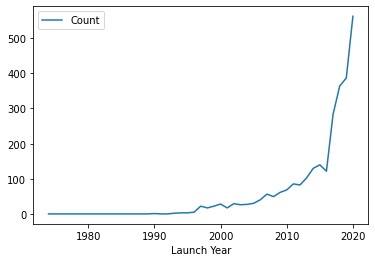

In [10]:
cleaned_yearly_df.plot.line(x = 'Launch Year' , y = 'Count')

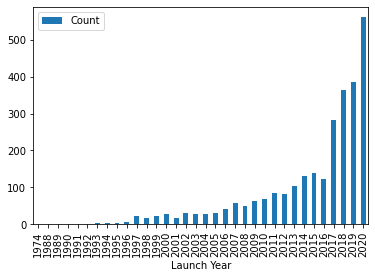

In [11]:
cleaned_yearly_df.plot.bar(x = 'Launch Year' , y = 'Count')

In [12]:
### Military vs commercial analysis starts here

In [13]:
satelites_users_df = cleaned_satellite_df
satelites_users_df = pd.DataFrame(satelites_users_df)
cleaned_users_df = pd.DataFrame()
satelites_users_df['Users'] = satelites_users_df['Users'].str.strip()
satelites_users_df['Users'] = satelites_users_df['Users'].str.replace('Civil', 'Commercial')
satelites_users_df['Users'] = satelites_users_df['Users'].str.replace('Military', 'Government')
satelites_users_df = satelites_users_df.groupby('Users').count()
satelites_users_df = satelites_users_df.reset_index()
cleaned_users_df ['Users'] = satelites_users_df['Users']
cleaned_users_df ['Count'] = satelites_users_df['Current Official Name of Satellite']
cleaned_users_df



,Users,Count
0,Commercial,1655
1,Commercial/Commercial,11
2,Commercial/Government,7
3,Government,810
4,Government/Commercial,241
5,Government/Commercial/Government,1
6,Government/Government,62


In [14]:
commercial = 0
government = 0
joint = 0

for x in range(len(cleaned_users_df.index)):
    if cleaned_users_df.iloc[x][0] == 'Commercial' or cleaned_users_df.iloc[x][0] == 'Commercial/Commercial':
        commercial = commercial + cleaned_users_df.iloc[x][1]
    elif cleaned_users_df.iloc[x][0] == 'Government' or cleaned_users_df.iloc[x][0] == 'Government/Government':
        government = government + cleaned_users_df.iloc[x][1]
    else:
        joint = joint + cleaned_users_df.iloc[x][1]

print(commercial)
print(government)
print(joint)

1666
872
249


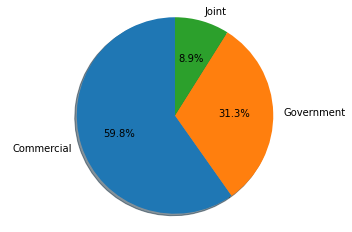

In [15]:
labels = ['Commercial' , 'Government' , 'Joint']
sizes = [commercial , government, joint]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

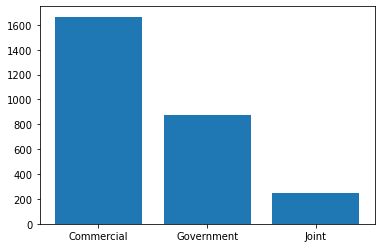

In [16]:
labels = ['Commercial' , 'Government' , 'Joint']
sizes = [commercial , government, joint]
fig1, ax1 = plt.subplots()
ax1.bar(labels, sizes)

plt.show()

In [17]:
### Launch Sites Starts here

In [18]:
# Import API key
from api_keys import g_key

# Configure gmaps
gmaps.configure(api_key=g_key)



In [19]:
launch_sites_df = pd.DataFrame()
cleaned_launch_df = pd.DataFrame()
launch_sites_df = cleaned_satellite_df.groupby('Launch Site').count()
launch_sites_df = launch_sites_df.reset_index()
cleaned_launch_df ['Launch Site'] = launch_sites_df['Launch Site']
cleaned_launch_df ['Count'] = launch_sites_df['Current Official Name of Satellite']
cleaned_launch_df 

,Launch Site,Count
0,Baikonur Cosmodrome,337
1,Cape Canaveral,778
2,Cygnus,33
3,Dombarovsky Air Base,45
4,Dragon CRS-17,1
5,Guiana Space Center,276
6,International Space Station,41
7,Jiuquan Satellite Launch Center,154
8,Kodiak Launch Complex,4
9,Kwajalein Island,2


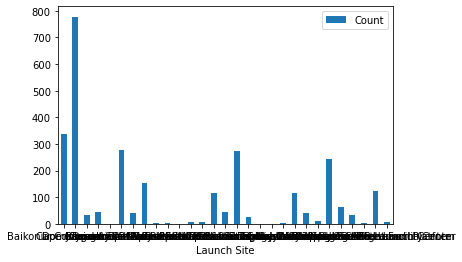

In [20]:
 ax = cleaned_launch_df.plot.bar(x='Launch Site', y='Count', rot=0)

In [21]:
sites = cleaned_launch_df['Launch Site'].tolist()
cleaned_launch_df = cleaned_launch_df.set_index("Launch Site")
cleaned_launch_df ['Lat'] = ''
cleaned_launch_df['Lng'] = ''
cleaned_launch_df

,Count,Lat,Lng
Launch Site,,,
Baikonur Cosmodrome,337,,
Cape Canaveral,778,,
Cygnus,33,,
Dombarovsky Air Base,45,,
Dragon CRS-17,1,,
Guiana Space Center,276,,
International Space Station,41,,
Jiuquan Satellite Launch Center,154,,
Kodiak Launch Complex,4,,


In [22]:
base_url = "https://maps.googleapis.com/maps/api/place/findplacefromtext/json"

for site in range(len(cleaned_launch_df.index)):
    params = {
        "input": sites[site],  
        "inputtype": 'textquery',
        'fields' : "geometry",
        "key": g_key,
        }
    
    
   
    try:
        response = requests.get(base_url, params=params).json()
        
        cleaned_launch_df.iloc[site, cleaned_launch_df.columns.get_loc('Lat')] = response['candidates'][0]['geometry']['location']['lat']
        cleaned_launch_df.iloc[site, cleaned_launch_df.columns.get_loc('Lng')] = response['candidates'][0]['geometry']['location']['lng']    
        print(sites[site])
        print(response)
    
    except(KeyError , IndexError):
        cleaned_launch_df.iloc[site, cleaned_launch_df.columns.get_loc('Lat')] = 0.0
        cleaned_launch_df.iloc[site, cleaned_launch_df.columns.get_loc('Lng')] = 0.0
        
        print(sites[site])        
        print('Not on Earth')
    
    


Baikonur Cosmodrome
{'candidates': [{'geometry': {'location': {'lat': 45.9645851, 'lng': 63.30524279999999}, 'viewport': {'northeast': {'lat': 45.96540412989273, 'lng': 63.30596877989271}, 'southwest': {'lat': 45.96270447010728, 'lng': 63.30326912010727}}}}], 'status': 'OK'}
Cape Canaveral
{'candidates': [{'geometry': {'location': {'lat': 28.4740089, 'lng': -80.5771737}, 'viewport': {'northeast': {'lat': 28.6053275, 'lng': -80.52474289999999}, 'southwest': {'lat': 28.409234, 'lng': -80.64041739999999}}}}, {'geometry': {'location': {'lat': 28.3922182, 'lng': -80.60771319999999}, 'viewport': {'northeast': {'lat': 28.406081, 'lng': -80.58991089999999}, 'southwest': {'lat': 28.370383, 'lng': -80.623614}}}}], 'status': 'OK'}
Cygnus
{'candidates': [{'geometry': {'location': {'lat': 15.5285465, 'lng': -88.02179939999999}, 'viewport': {'northeast': {'lat': 15.52985837989272, 'lng': -88.02036627010727}, 'southwest': {'lat': 15.52715872010728, 'lng': -88.02306592989272}}}}], 'status': 'OK'}
Domb

In [23]:
cleaned_launch_df 

,Count,Lat,Lng
Launch Site,,,
Baikonur Cosmodrome,337,45.9646,63.3052
Cape Canaveral,778,28.474,-80.5772
Cygnus,33,15.5285,-88.0218
Dombarovsky Air Base,45,51.0944,59.8424
Dragon CRS-17,1,0,0
Guiana Space Center,276,5.16733,-52.6832
International Space Station,41,29.5593,-95.09
Jiuquan Satellite Launch Center,154,40.9845,100.209
Kodiak Launch Complex,4,57.4352,-152.34


In [24]:
# Store latitude and longitude in locations
locations = cleaned_launch_df[["Lat", "Lng"]]

# Fill NaN values and convert to float
rating = cleaned_launch_df["Count"].astype(float)

In [30]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=100,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure 
fig

Figure(layout=FigureLayout(height='420px'))

In [31]:

# Add marker layer ontop of heat map
marked_loc = gmaps.marker_layer(locations, info_box_content = sites)
fig.add_layer(marked_loc)


# Display figure
fig

Figure(layout=FigureLayout(height='420px'))